In [1]:
!pip install ucimlrepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr#

### Sabrina's Notes

`ucimlr` package provides easy access to datasets from the UC Irvine Machine Learning Repository (UCI MLR). 

Reference: https://github.com/uci-ml-repo/ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset (the id is found on 'cite' in the UCI website)
abalone = fetch_ucirepo(id=1)

In [3]:
print(abalone.variables)

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

In [4]:
# Metadata
print(abalone.metadata)

# Dataset note :+1.5 gives the age in years

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [5]:
abalone.data.original

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
df=abalone.data.original
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [9]:
# Add 1.5 to rings for get age
df['Age'] = df['Rings'] + 1.5

In [10]:
# We dont need rings column
df.drop("Rings",axis=1,inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [11]:
# Check null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

In [12]:
# Values of this dataset can not be zero, check zeros
(df==0).any()

Sex               False
Length            False
Diameter          False
Height             True
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Age               False
dtype: bool

In [13]:
df[df["Height"]==0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [14]:
# We can delete these rows 2 in 4177
df = df.drop(df[df["Height"]==0].index)

In [15]:
# Check values
df[df["Height"]==0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age


In [16]:
# Reset indexes
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)

In [17]:
# Check columns
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [18]:
df.Age.value_counts()

10.5    689
11.5    634
9.5     567
12.5    487
8.5     391
13.5    267
7.5     258
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: Age, dtype: int64

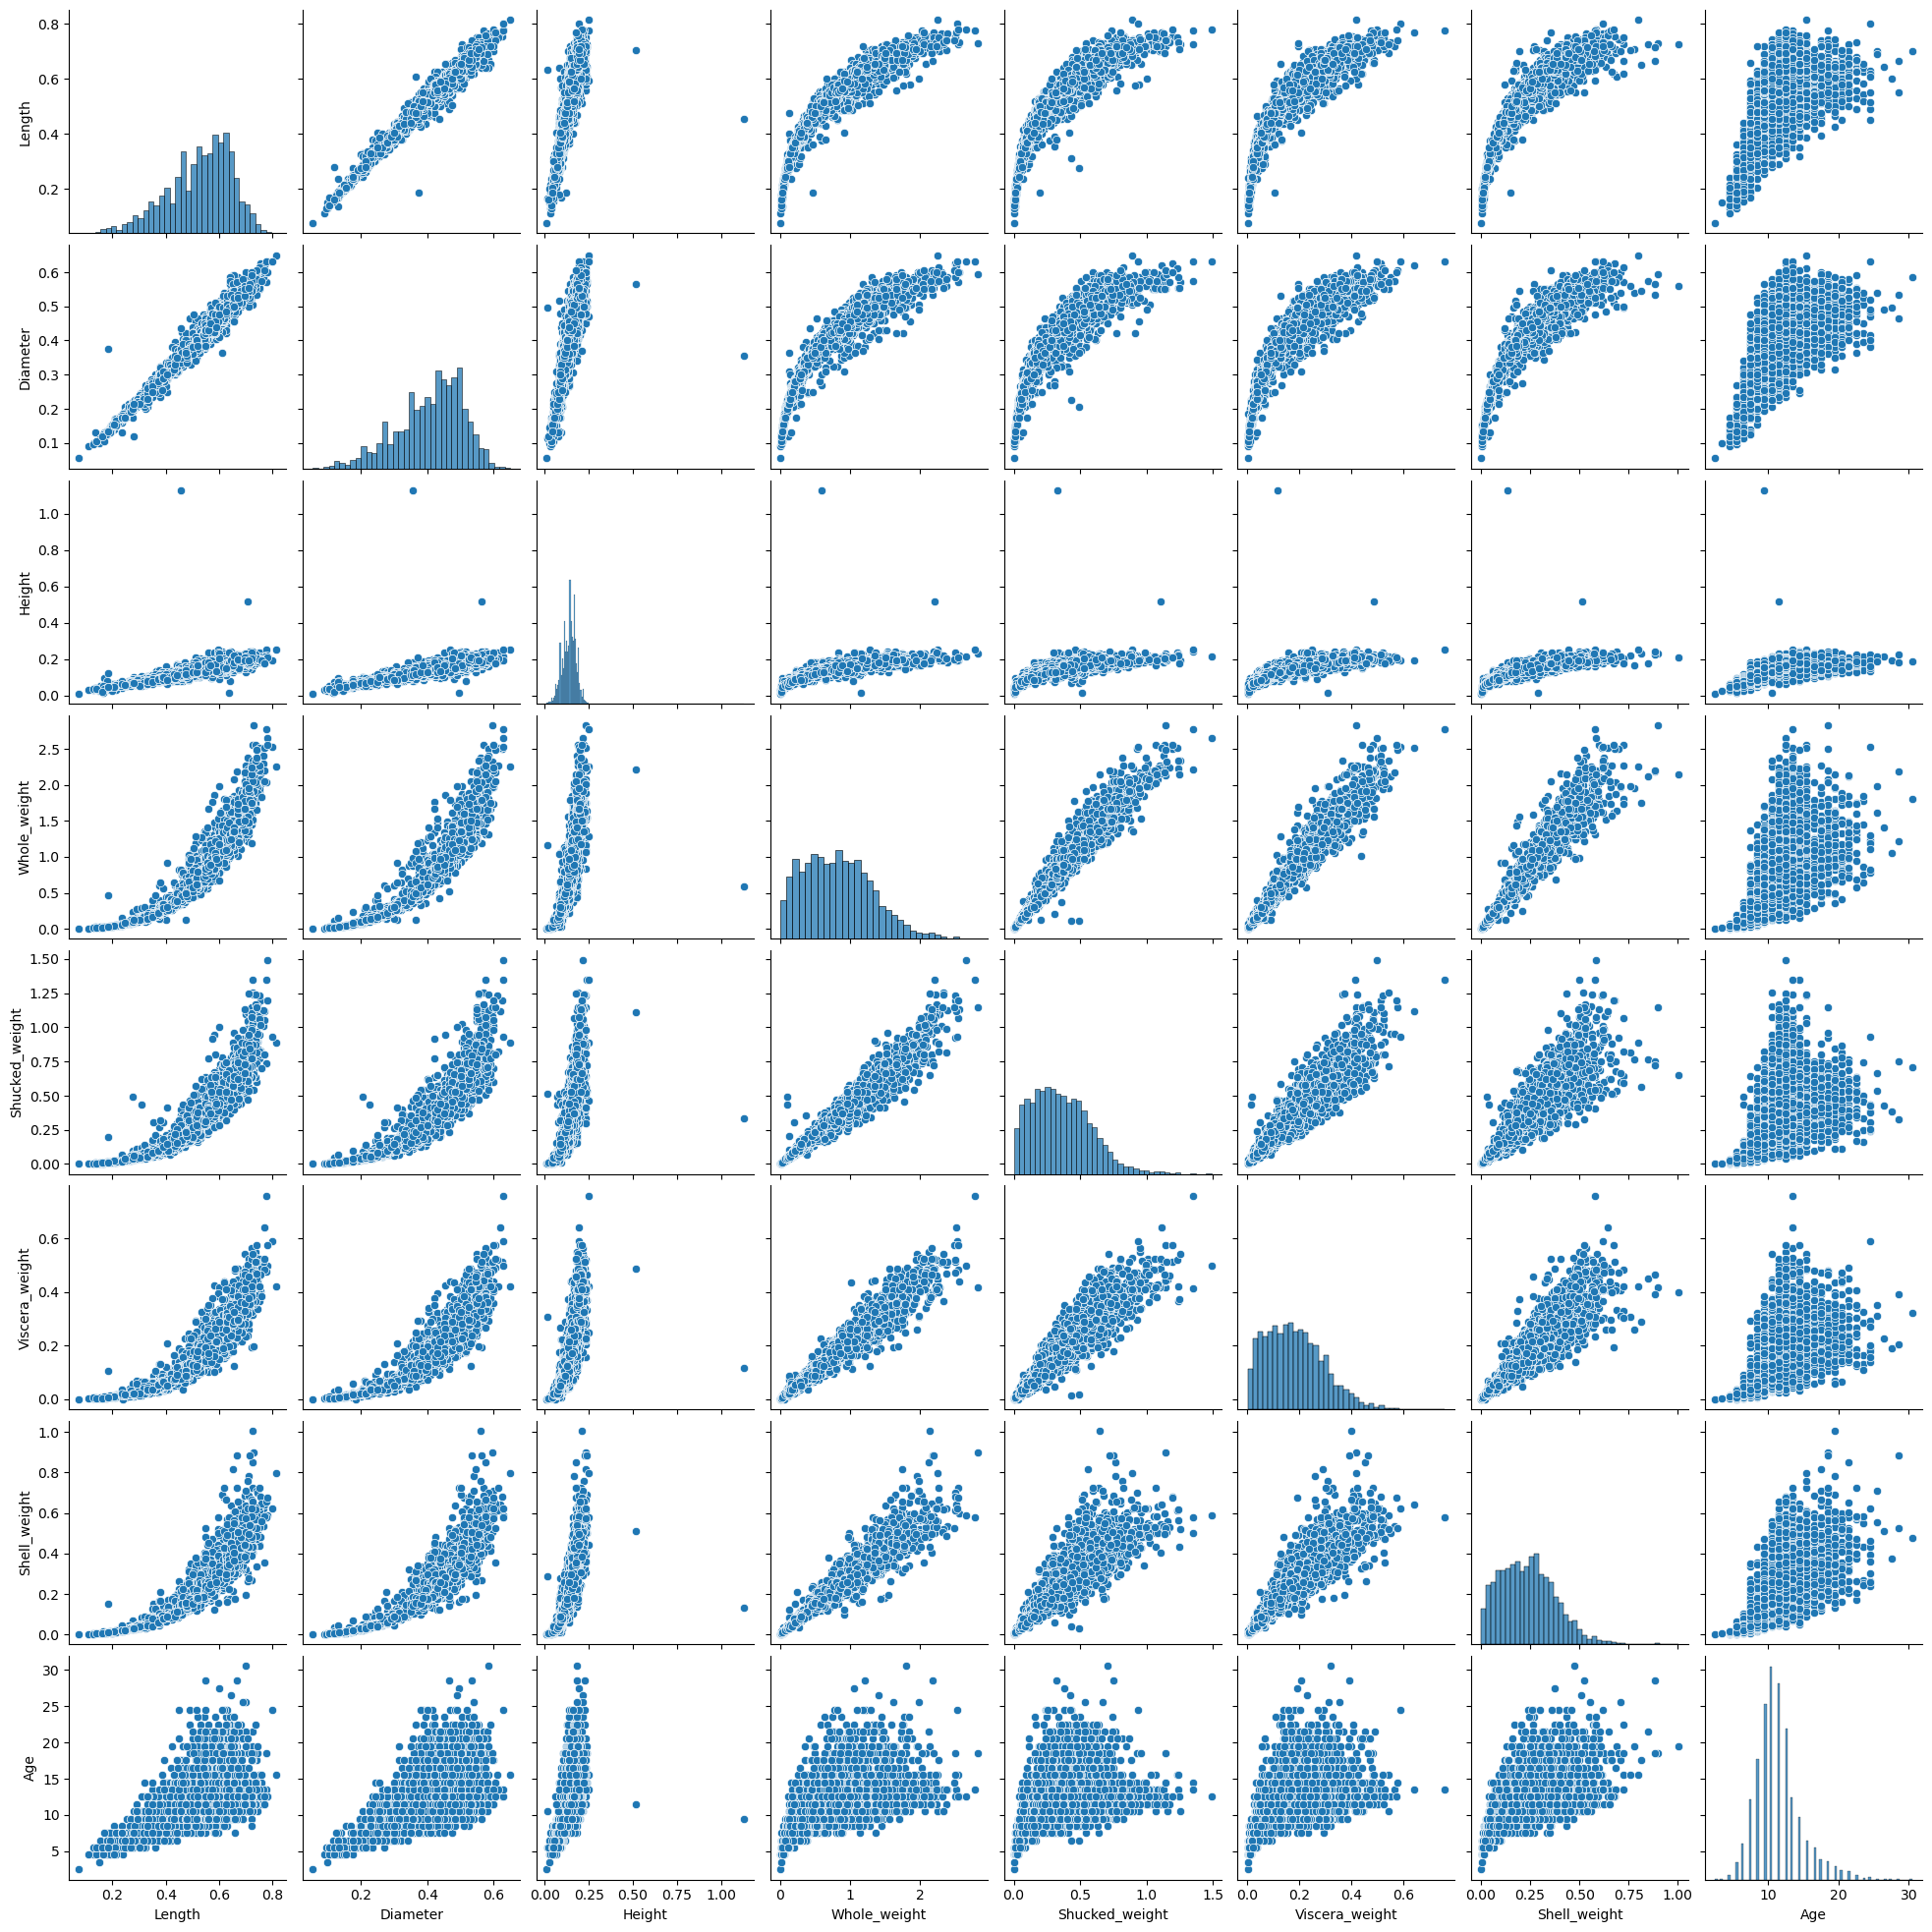

In [19]:
# Check relationship between columns, there is some outlier values
sns.pairplot(df)

In [20]:
# Select target columns
target_columns=[]
df_temp=df.drop(["Sex","Age"],axis=1)
target_columns=df_temp.columns.to_list()
target_columns

['Length',
 'Diameter',
 'Height',
 'Whole_weight',
 'Shucked_weight',
 'Viscera_weight',
 'Shell_weight']

### Sabrina's Notes

Detecting outliers 

Reference: https://stackoverflow.com/questions/66966605/outliers-formula-for-columns-in-pandas
Reference: https://gist.github.com/joseph-allen/14d72af86689c99e1e225e5771ce1600?permalink_comment_id=3554420
Reference: https://community.dataquest.io/t/detecting-outliers-and-deleting-them-in-python-or-r/8448/2

The code below goes through each characteristic of a dataset, such as age or height, checking for unusual values that don't fit the typical range. It figures out what the "normal" range of values is by looking at where most of the data falls (25% below and 75% below). Then, it marks anything far outside this range as unusual, and if there are too many unusual values, it removes them from the dataset. This helps make sure the dataset is accurate and useful for analysis, without any strange or incorrect data messing things up.

In [21]:
# Detect outliers

for i in df.columns:
  if i in target_columns :
        # 1st quartile
        Q1 = np.percentile(df[i],25)
        # 3rd quartile
        Q3 = np.percentile(df[i],75)
        # IQR calculation
        IQR = Q3 - Q1
        # Range calculation
        lower_bound = Q1 - (IQR * 1.5)
        upper_bound = Q3 + (IQR * 1.5)
        # Outlier detection
        print("Range of " + i  + " : "+ str(lower_bound)  + " - " + str(upper_bound))
        outliers = df[(df[i] <= lower_bound) | (df[i] >= upper_bound)]
        # Print outlier count
        print(f"Outlier count for column {i} : {len(outliers)}")
        # Delete outliers
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

Range of Length : 0.20250000000000004 - 0.8624999999999999
Outlier count for column Length : 49
Range of Diameter : 0.15499999999999997 - 0.675
Outlier count for column Diameter : 12
Range of Height : 0.039999999999999994 - 0.24000000000000002
Outlier count for column Height : 6
Range of Whole_weight : -0.6031874999999999 - 2.2173125
Outlier count for column Whole_weight : 28
Range of Shucked_weight : -0.27324999999999994 - 0.9647499999999999
Outlier count for column Shucked_weight : 25
Range of Viscera_weight : -0.13549999999999998 - 0.4805
Outlier count for column Viscera_weight : 15
Range of Shell_weight : -0.15325 - 0.60875
Outlier count for column Shell_weight : 28


In [22]:
# Check row count
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4013.0,0.524533,0.110511,0.2050,0.4500,0.5400,0.6100,0.7600
Diameter,4013.0,0.408242,0.091758,0.1550,0.3500,0.4200,0.4800,0.6000
Height,4013.0,0.139090,0.035588,0.0400,0.1150,0.1400,0.1650,0.2400
Whole_weight,4013.0,0.809481,0.445060,0.0425,0.4475,0.7945,1.1330,2.1275
Shucked_weight,4013.0,0.350871,0.200989,0.0170,0.1890,0.3340,0.4935,0.9600
Viscera_weight,4013.0,0.176759,0.100637,0.0005,0.0950,0.1690,0.2465,0.4805
Shell_weight,4013.0,0.233437,0.125749,0.0130,0.1315,0.2300,0.3200,0.6050
Age,4013.0,11.442935,3.117503,4.5000,9.5000,10.5000,12.5000,30.5000


In [23]:
# Reset index
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)

In [24]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [25]:
# Extract dummy variables
Sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, Sex_dummies], axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age,Sex_F,Sex_I,Sex_M
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


In [26]:
# Replace age column place
columns = list(df.columns)
columns.append(columns.pop(columns.index('Age')))
df = df[columns]
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,8.5


In [27]:
# Drop Sex column
df=df.drop("Sex",axis=1)
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,8.5


In [28]:
# Print final dataframe
df.to_excel("Abolone.xlsx", index=False)

In [29]:
df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Age
Length,1.000000,0.985519,0.889740,0.940036,0.913472,0.912445,0.915753,0.306682,-0.540366,0.228107,0.516975
Diameter,0.985519,1.000000,0.896402,0.939106,0.906991,0.907697,0.923392,0.316169,-0.554254,0.232421,0.537673
Height,0.889740,0.896402,1.000000,0.891478,0.837605,0.867697,0.898255,0.316342,-0.549196,0.227348,0.578849
Whole_weight,0.940036,0.939106,0.891478,1.000000,0.968244,0.964702,0.958049,0.310763,-0.561065,0.244243,0.516195
Shucked_weight,0.913472,0.906991,0.837605,0.968244,1.000000,0.926837,0.886797,0.275887,-0.523608,0.241570,0.392160
Viscera_weight,0.912445,0.907697,0.867697,0.964702,0.926837,1.000000,0.912473,0.316736,-0.557414,0.234938,0.480007
Shell_weight,0.915753,0.923392,0.898255,0.958049,0.886797,0.912473,1.000000,0.314563,-0.552794,0.232555,0.605703
Sex_F,0.306682,0.316169,0.316342,0.310763,0.275887,0.316736,0.314563,1.000000,-0.465652,-0.513319,0.240835
Sex_I,-0.540366,-0.554254,-0.549196,-0.561065,-0.523608,-0.557414,-0.552794,-0.465652,1.000000,-0.520449,-0.418521
Sex_M,0.228107,0.232421,0.227348,0.244243,0.241570,0.234938,0.232555,-0.513319,-0.520449,1.000000,0.173483


# Resampling Part

In [67]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as skl_lm
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

References: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://stackoverflow.com/questions/43519160/matplotlib-scatter-plot-with-colormaps-for-edgecolor-but-no-facecolor

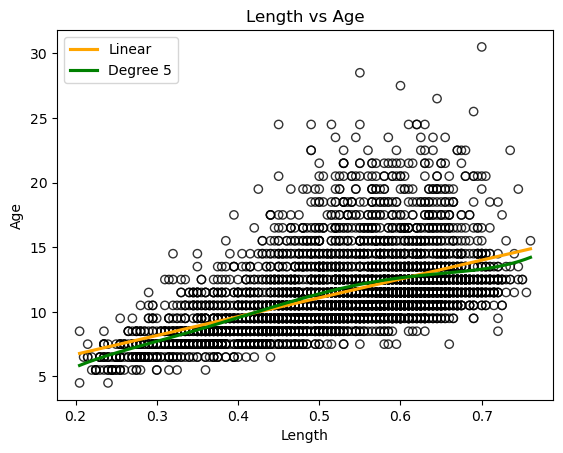

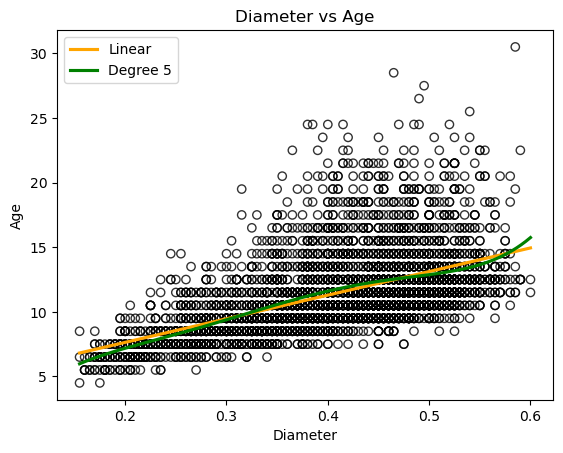

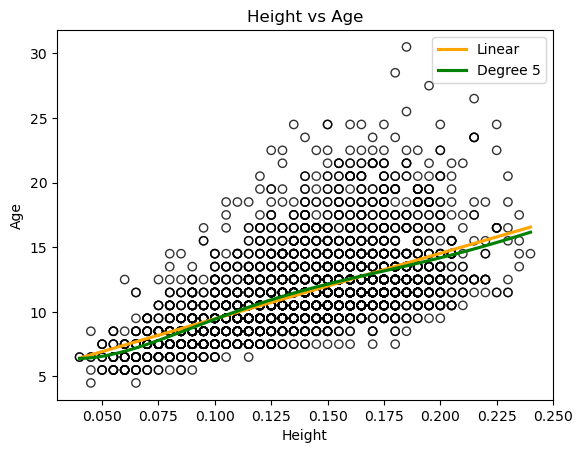

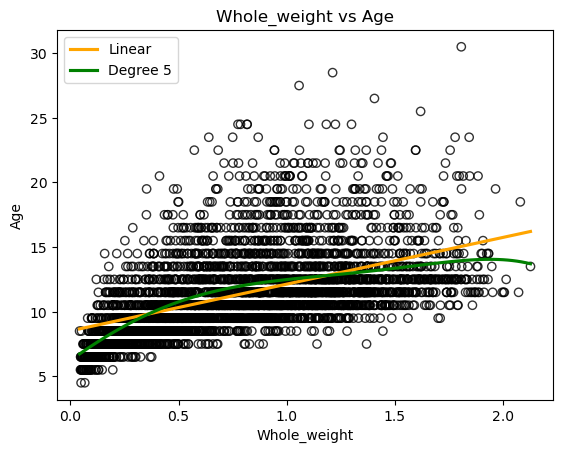

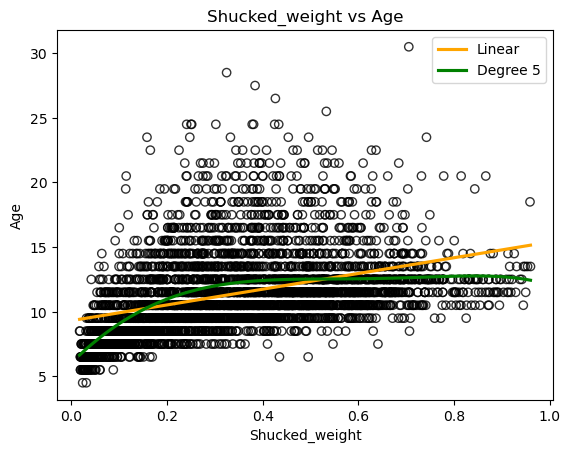

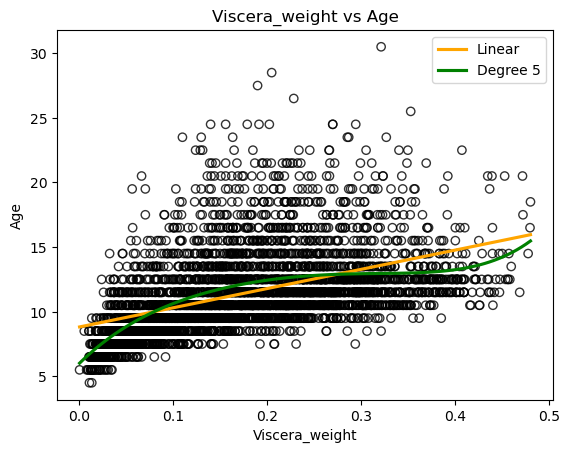

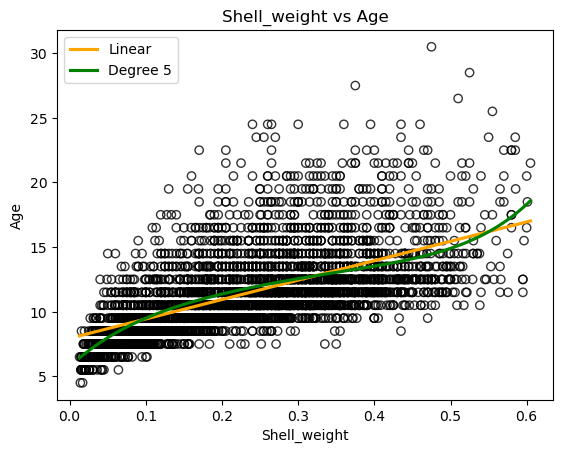

In [32]:
columns = df.columns.drop(['Age',"Sex_I","Sex_M","Sex_F"])

# Plot each feature against 'age'
for col in columns:
    plt.scatter(df[col], df['Age'], facecolors='None', edgecolors='k', alpha=0.8)
    sns.regplot(x=df[col], y=df['Age'], ci=None, label='Linear', scatter=False, color='orange')
    sns.regplot(x=df[col], y=df['Age'], ci=None, label='Degree 5', order=5, scatter=False, color='g')
    plt.xlabel(col)
    plt.ylabel('Age')
    plt.title(f'{col} vs Age')
    plt.legend()
    plt.show()

In [33]:
independent_vars = df.columns.drop(['Age'])

# Regression model
formula = 'Age ~ ' + ' + '.join(independent_vars)
# OLS model
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     483.2
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        01:12:45   Log-Likelihood:                -8781.1
No. Observations:                4013   AIC:                         1.758e+04
Df Residuals:                    4003   BIC:                         1.765e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.0601      0.253     16.

References:
The .join method is a string method in Python that is used to concatenate a sequence of strings with a specified separator, which was useful to connect the independant variable to OLS
https://stackoverflow.com/questions/76994016/loop-regression-models-and-combine-them-in-modelsummary-r
https://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame

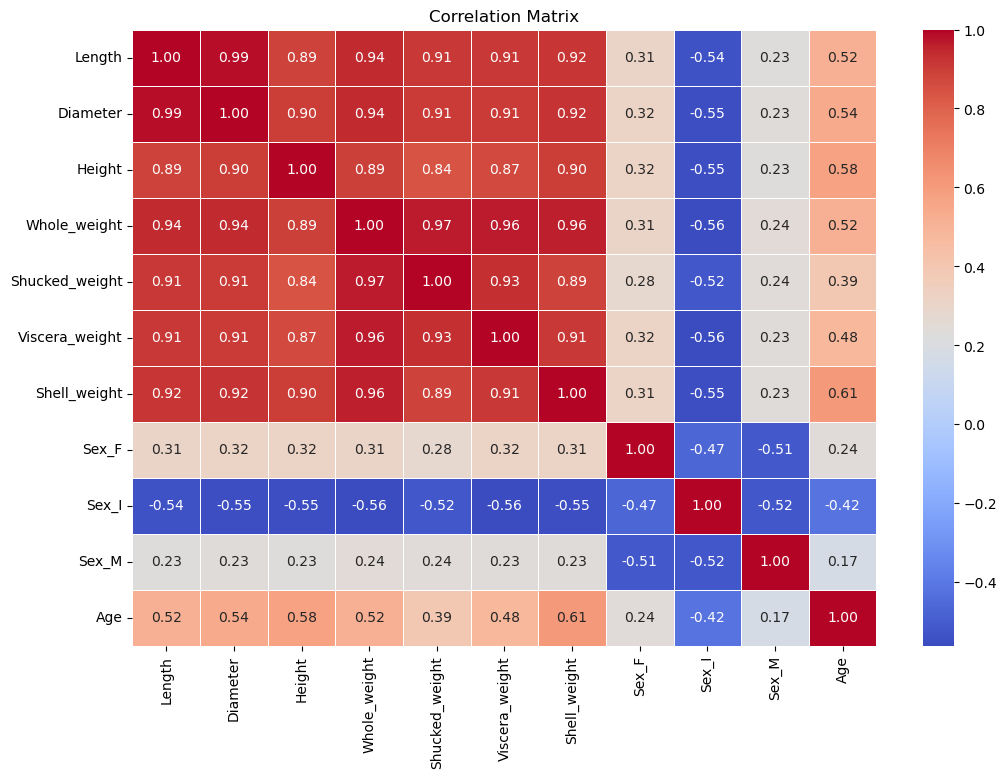

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

References:
https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [35]:
X = df[independent_vars]
y = df['Age']
std_reg = LinearRegression().fit(X, y)
print("Regression Coefficients:", std_reg.coef_)

Regression Coefficients: [-1.74516645e+00  8.34256633e+00  2.21645159e+01  9.41002816e+00
 -2.09297998e+01 -1.20273057e+01  1.00527850e+01 -1.55093733e+14
 -1.55093733e+14 -1.55093733e+14]


In [36]:
std_X = X.std()
std_y = y.std()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = (y - y.mean()) / y.std()

std_reg = LinearRegression().fit(X_scaled, y_scaled)

std_beta_coefficients = std_reg.coef_

for i, col in enumerate(independent_vars):
    std_var = std_X[i]
    beta_var = std_beta_coefficients[i]
    change_in_age = beta_var * std_y
    print(f"A one standard deviation change in {col} ({std_var:.2f}) results in a change of {change_in_age:.2f} units in the age variable.")

A one standard deviation change in Length (0.11) results in a change of -0.26 units in the age variable.
A one standard deviation change in Diameter (0.09) results in a change of 0.83 units in the age variable.
A one standard deviation change in Height (0.04) results in a change of 0.77 units in the age variable.
A one standard deviation change in Whole_weight (0.45) results in a change of 4.15 units in the age variable.
A one standard deviation change in Shucked_weight (0.20) results in a change of -4.20 units in the age variable.
A one standard deviation change in Viscera_weight (0.10) results in a change of -1.20 units in the age variable.
A one standard deviation change in Shell_weight (0.13) results in a change of 1.28 units in the age variable.
A one standard deviation change in Sex_F (0.46) results in a change of -33324578660633.21 units in the age variable.
A one standard deviation change in Sex_I (0.47) results in a change of -33492598565047.82 units in the age variable.
A one

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4013.0,0.524533,0.110511,0.2050,0.4500,0.5400,0.6100,0.7600
Diameter,4013.0,0.408242,0.091758,0.1550,0.3500,0.4200,0.4800,0.6000
Height,4013.0,0.139090,0.035588,0.0400,0.1150,0.1400,0.1650,0.2400
Whole_weight,4013.0,0.809481,0.445060,0.0425,0.4475,0.7945,1.1330,2.1275
Shucked_weight,4013.0,0.350871,0.200989,0.0170,0.1890,0.3340,0.4935,0.9600
Viscera_weight,4013.0,0.176759,0.100637,0.0005,0.0950,0.1690,0.2465,0.4805
Shell_weight,4013.0,0.233437,0.125749,0.0130,0.1315,0.2300,0.3200,0.6050
Sex_F,4013.0,0.314727,0.464465,0.0000,0.0000,0.0000,1.0000,1.0000
Sex_I,4013.0,0.320708,0.466807,0.0000,0.0000,0.0000,1.0000,1.0000
Sex_M,4013.0,0.364565,0.481368,0.0000,0.0000,0.0000,1.0000,1.0000


### Sabrina's Notes
The Abalone dataset has a numerical target variable, age, instead of a categorical one like: Direction.
So if I want to create a classification problem (e.g., predicting if age is above a certain threshold), 
I can use logistic regression.

In [38]:
df['Direction'] = np.where(df['Age'] >= 10, 'Old', 'Young')

In [39]:
formula = 'Direction ~ Length + Diameter + Height + Whole_weight + Shucked_weight + Viscera_weight + Shell_weight'
model = smf.glm(formula=formula, data=df, family=sm.families.Binomial()).fit()
print(model.summary())

                           Generalized Linear Model Regression Results                            
Dep. Variable:     ['Direction[Old]', 'Direction[Young]']   No. Observations:                 4013
Model:                                                GLM   Df Residuals:                     4005
Model Family:                                    Binomial   Df Model:                            7
Link Function:                                      Logit   Scale:                          1.0000
Method:                                              IRLS   Log-Likelihood:                -1504.5
Date:                                    Wed, 22 May 2024   Deviance:                       3008.9
Time:                                            01:12:46   Pearson chi2:                 4.86e+03
No. Iterations:                                         7   Pseudo R-squ. (CS):             0.4085
Covariance Type:                                nonrobust                                         
          

In [40]:
predictions = model.predict(df)

In [41]:
predictions_nominal = ['Old' if x > 0.5 else 'Young' for x in predictions]

In [42]:
print(confusion_matrix(df['Direction'], predictions_nominal))

[[2367  303]
 [ 373  970]]


In [43]:
print(classification_report(df['Direction'], predictions_nominal, digits=3))

              precision    recall  f1-score   support

         Old      0.864     0.887     0.875      2670
       Young      0.762     0.722     0.742      1343

    accuracy                          0.832      4013
   macro avg      0.813     0.804     0.808      4013
weighted avg      0.830     0.832     0.830      4013



### Sabrina's Notes
The classification report shows that the logistic regression model performs well overall, with an accuracy of 83.2%.
 For the "Old" class, it achieves high precision (86.4%) and recall (88.7%), indicating reliable identification of older instances.
  For the "Young" class, the precision is 76.2% and recall is 72.2%, showing good but slightly lower performance compared to the "Old" class.
  Overall, the model demonstrates strong predictive capabilities with balanced precision and recall.

### Sabrina's Notes
I will apply a logistic regression model to the Abalone dataset to classify whether an abalone's age is above or below a certain threshold (e.g., 10 years)

In [44]:
X = df.drop(["Age","Direction"],axis=1)
y = df['Direction']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [47]:
print(log_reg.coef_)

[[-1.82059874 -2.50835952 -1.9795788  -2.95693491  5.30582109 -0.73693099
  -5.58788312 -0.42183953  0.71937857 -0.29717653]]


In [48]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

In [49]:
y_pred = ['Old' if x > 0.5 else 'Young' for x in y_pred_prob]

In [50]:
print(confusion_matrix(y_test, y_pred))

[[ 75 589]
 [238 102]]


In [51]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

         Old      0.240     0.113     0.154       664
       Young      0.148     0.300     0.198       340

    accuracy                          0.176      1004
   macro avg      0.194     0.206     0.176      1004
weighted avg      0.208     0.176     0.169      1004



## Preparing Dataset

In [52]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Age,Direction
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1,16.5,Old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1,8.5,Young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0,10.5,Old
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1,11.5,Old
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0,8.5,Young


In [53]:
df["Sex_I"].replace({False: 0, True: 1}, inplace=True)
df["Sex_F"].replace({False: 0, True: 1}, inplace=True)
df["Sex_M"].replace({False: 0, True: 1}, inplace=True)

df.drop(["Direction"],axis=1,inplace=True)

In [54]:
X = df.drop(columns=['Age'])
y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [56]:
# Linear Regression
lm = skl_lm.LinearRegression()
model = lm.fit(X_train, y_train)

pred = model.predict(X_test)

MSE = mean_squared_error(y_test, pred)
print(f'Linear Regression MSE: {MSE}')

Linear Regression MSE: 4.584462823145893


In [57]:
# Polynomial Regression Quadratic & Cubic
# Quadratic Model
poly = PolynomialFeatures(degree=2)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
model2 = lm.fit(X_train2, y_train)
MSE2 = mean_squared_error(y_test, model2.predict(X_test2))
print(f'Quadratic Regression MSE: {MSE2}')

# Cubic Model
poly = PolynomialFeatures(degree=3)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)
model3 = lm.fit(X_train3, y_train)
MSE3 = mean_squared_error(y_test, model3.predict(X_test3))
print(f'Cubic Regression MSE: {MSE3}')

Quadratic Regression MSE: 4.227475823634174
Cubic Regression MSE: 5.287005937431913


In [58]:
# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
X = df.drop(columns=["Age"]).values
Y = df['Age'].values

crossvalidation = KFold(n_splits=len(df), random_state=None, shuffle=False)
scores = cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Folds: 4013, MSE: 4.695014978506617, STD: 10.506065058521795


In [68]:
# k-Fold Cross-Validation
lm = LinearRegression()
crossvalidation = KFold(n_splits=10, random_state=1, shuffle=True)
for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X)
    model = lm.fit(X_current, y)
    scores = cross_val_score(model, X_current, y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
    print("Degree-" + str(i) + " polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 4.698334011201965, STD: 0.4487008812391235
Degree-2 polynomial MSE: 4.403694403559916, STD: 0.49526440726545484
Degree-3 polynomial MSE: 4.921231496027998, STD: 0.5666926969530767
Degree-4 polynomial MSE: 34.80248972227986, STD: 56.529024859619234
Degree-5 polynomial MSE: 10493.675161531643, STD: 16046.066379903717
Degree-6 polynomial MSE: 368651825.29214674, STD: 469548105.4690209
Degree-7 polynomial MSE: 9500301585.011177, STD: 7510437103.350737
Degree-8 polynomial MSE: 45430140222.40567, STD: 113968811042.82635
Degree-9 polynomial MSE: 156077123922.3061, STD: 423357785189.41693
Degree-10 polynomial MSE: 193446753123.29382, STD: 483725564675.724


In [60]:
# Bootstrap
lm = skl_lm.LinearRegression()
clf = lm.fit(X,y)
y_pred = clf.predict(X)
rmse_original = np.sqrt(mean_squared_error(y, y_pred))
print("Original Model RMSE:", rmse_original)

Original Model RMSE: 2.159429062830834


In [61]:
Xsamp, ysamp = resample(X, y, n_samples = 500)
clf = lm.fit(Xsamp, ysamp)
y_pred = clf.predict(X)
rmse_ = np.sqrt(mean_squared_error(y, y_pred))
print(" 500 Sample RMSE:", rmse_)

 500 Sample RMSE: 2.2084379347086998


In [62]:
Xsamp, ysamp = resample(X, y, n_samples = 1500)
clf = lm.fit(Xsamp, ysamp)
y_pred = clf.predict(X)
rmse_ = np.sqrt(mean_squared_error(y, y_pred))
print(" 1500 Sample RMSE:", rmse_)

 1500 Sample RMSE: 2.163357757514823


In [63]:
Xsamp, ysamp = resample(X, y, n_samples = 2000)
clf = lm.fit(Xsamp, ysamp)
y_pred = clf.predict(X)
rmse_ = np.sqrt(mean_squared_error(y, y_pred))
print(" 2000 Sample RMSE:", rmse_)

 2000 Sample RMSE: 2.1653980658571426


## Final Note:
Even if the sample size changes, the RMSE values provide insight into the model's prediction accuracy and stability.
If the RMSE values are consistent across different bootstrap samples, it indicates that the model's predictions are stable and reliable.

In [64]:
import joblib

In [65]:
# Load the trained model
model = joblib.load('trained_model.pkl')

# Prepare input data (X_test) - assuming X_test is your input data
# You need to prepare X_test in the same format as the data used to train the model

# Make predictions

FileNotFoundError: [Errno 2] No such file or directory: 'trained_model.pkl'

In [ ]:
predictions = model.predict(X_test)
